In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/home/student/3102/bank_data_set.csv")

In [3]:
data.shape

(11162, 17)

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
print("Unique values in 'marital':", data["marital"].unique())

Unique values in 'marital': ['married' 'single' 'divorced']


In [10]:
marital_mapping = {"single": 0, "married": 1, "divorced": 2}

In [11]:
education_mapping = {"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3}

In [12]:
data["marital"] = data["marital"].map(marital_mapping)

In [13]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,1,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,1,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,1,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,1,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [14]:
data["education"] = data["education"].map(education_mapping)

In [15]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,2,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,1,2,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,1,2,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,1,2,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,1,3,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,0,3,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,1,3,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,2,2,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,1,2,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,0,2,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [16]:
data["default"] = le.fit_transform(data["default"].values)
data["housing"] = le.fit_transform(data["housing"].values)
data["loan"] = le.fit_transform(data["loan"].values)
data["deposit"] = le.fit_transform(data["deposit"].values)

In [17]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,2,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,1,2,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,1,2,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,1,2,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,1,3,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [18]:
contact_mapping = {"unknown": 0, "telephone": 1, "cellular": 2}

In [19]:
data["contact"] = data["contact"].map(contact_mapping)

In [20]:
data["job"] = data["job"].replace({"admin.": "admin"})

In [21]:
job_mapping = {"admin": 0, "unknown": 1, "unemployed": 2, "management": 3, "housemaid": 4, "entrepreneur": 5, "student": 6, "blue-collar": 7, "self-employed": 8, "retired": 9, "technician": 10, "services": 11 }

In [22]:
data["job"] = data["job"].map(job_mapping)

In [23]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,2,0,2343,1,0,0,5,may,1042,1,-1,0,unknown,1
1,56,0,1,2,0,45,0,0,0,5,may,1467,1,-1,0,unknown,1
2,41,10,1,2,0,1270,1,0,0,5,may,1389,1,-1,0,unknown,1
3,55,11,1,2,0,2476,1,0,0,5,may,579,1,-1,0,unknown,1
4,54,0,1,3,0,184,0,0,0,5,may,673,2,-1,0,unknown,1


In [24]:
month_mapping = {"jan": 0, "feb": 1, "mar": 2, "apr": 3, "may": 4, "jun": 5, "jul": 6, "aug": 7, "sep": 8, "oct": 9, "nov": 10, "dec": 11 }

In [25]:
data["month"] = data["month"].map(month_mapping)

In [26]:
poutcome_mapping = {"unknown": 0, "success": 1, "failure": 2, "other": 3 }

In [27]:
data["poutcome"] = data["poutcome"].map(poutcome_mapping)

In [28]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,2,0,2343,1,0,0,5,4,1042,1,-1,0,0,1
1,56,0,1,2,0,45,0,0,0,5,4,1467,1,-1,0,0,1
2,41,10,1,2,0,1270,1,0,0,5,4,1389,1,-1,0,0,1
3,55,11,1,2,0,2476,1,0,0,5,4,579,1,-1,0,0,1
4,54,0,1,3,0,184,0,0,0,5,4,673,2,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,7,0,1,0,1,1,0,2,20,3,257,1,-1,0,0,0
11158,39,11,1,2,0,733,0,0,0,16,5,83,4,-1,0,0,0
11159,32,10,0,2,0,29,0,0,2,19,7,156,2,-1,0,0,0
11160,43,10,1,2,0,0,0,1,2,8,4,9,2,172,5,2,0


In [29]:
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='balance'>

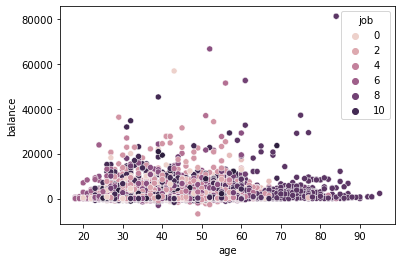

In [30]:
sns.scatterplot(data=data,x='age',y='balance',hue='job')

<AxesSubplot:xlabel='marital', ylabel='education'>

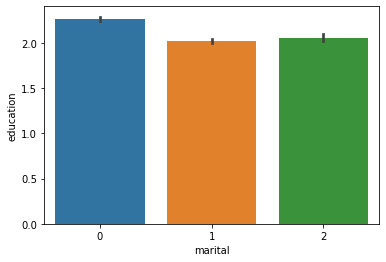

In [31]:
sns.barplot(data=data,x='marital',y='education')

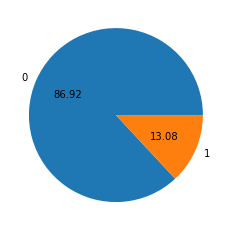

In [32]:
import matplotlib.pyplot as plt
loan = data['loan'].value_counts()
plt.pie(loan,labels=loan.index,autopct='%.2f')
plt.show()

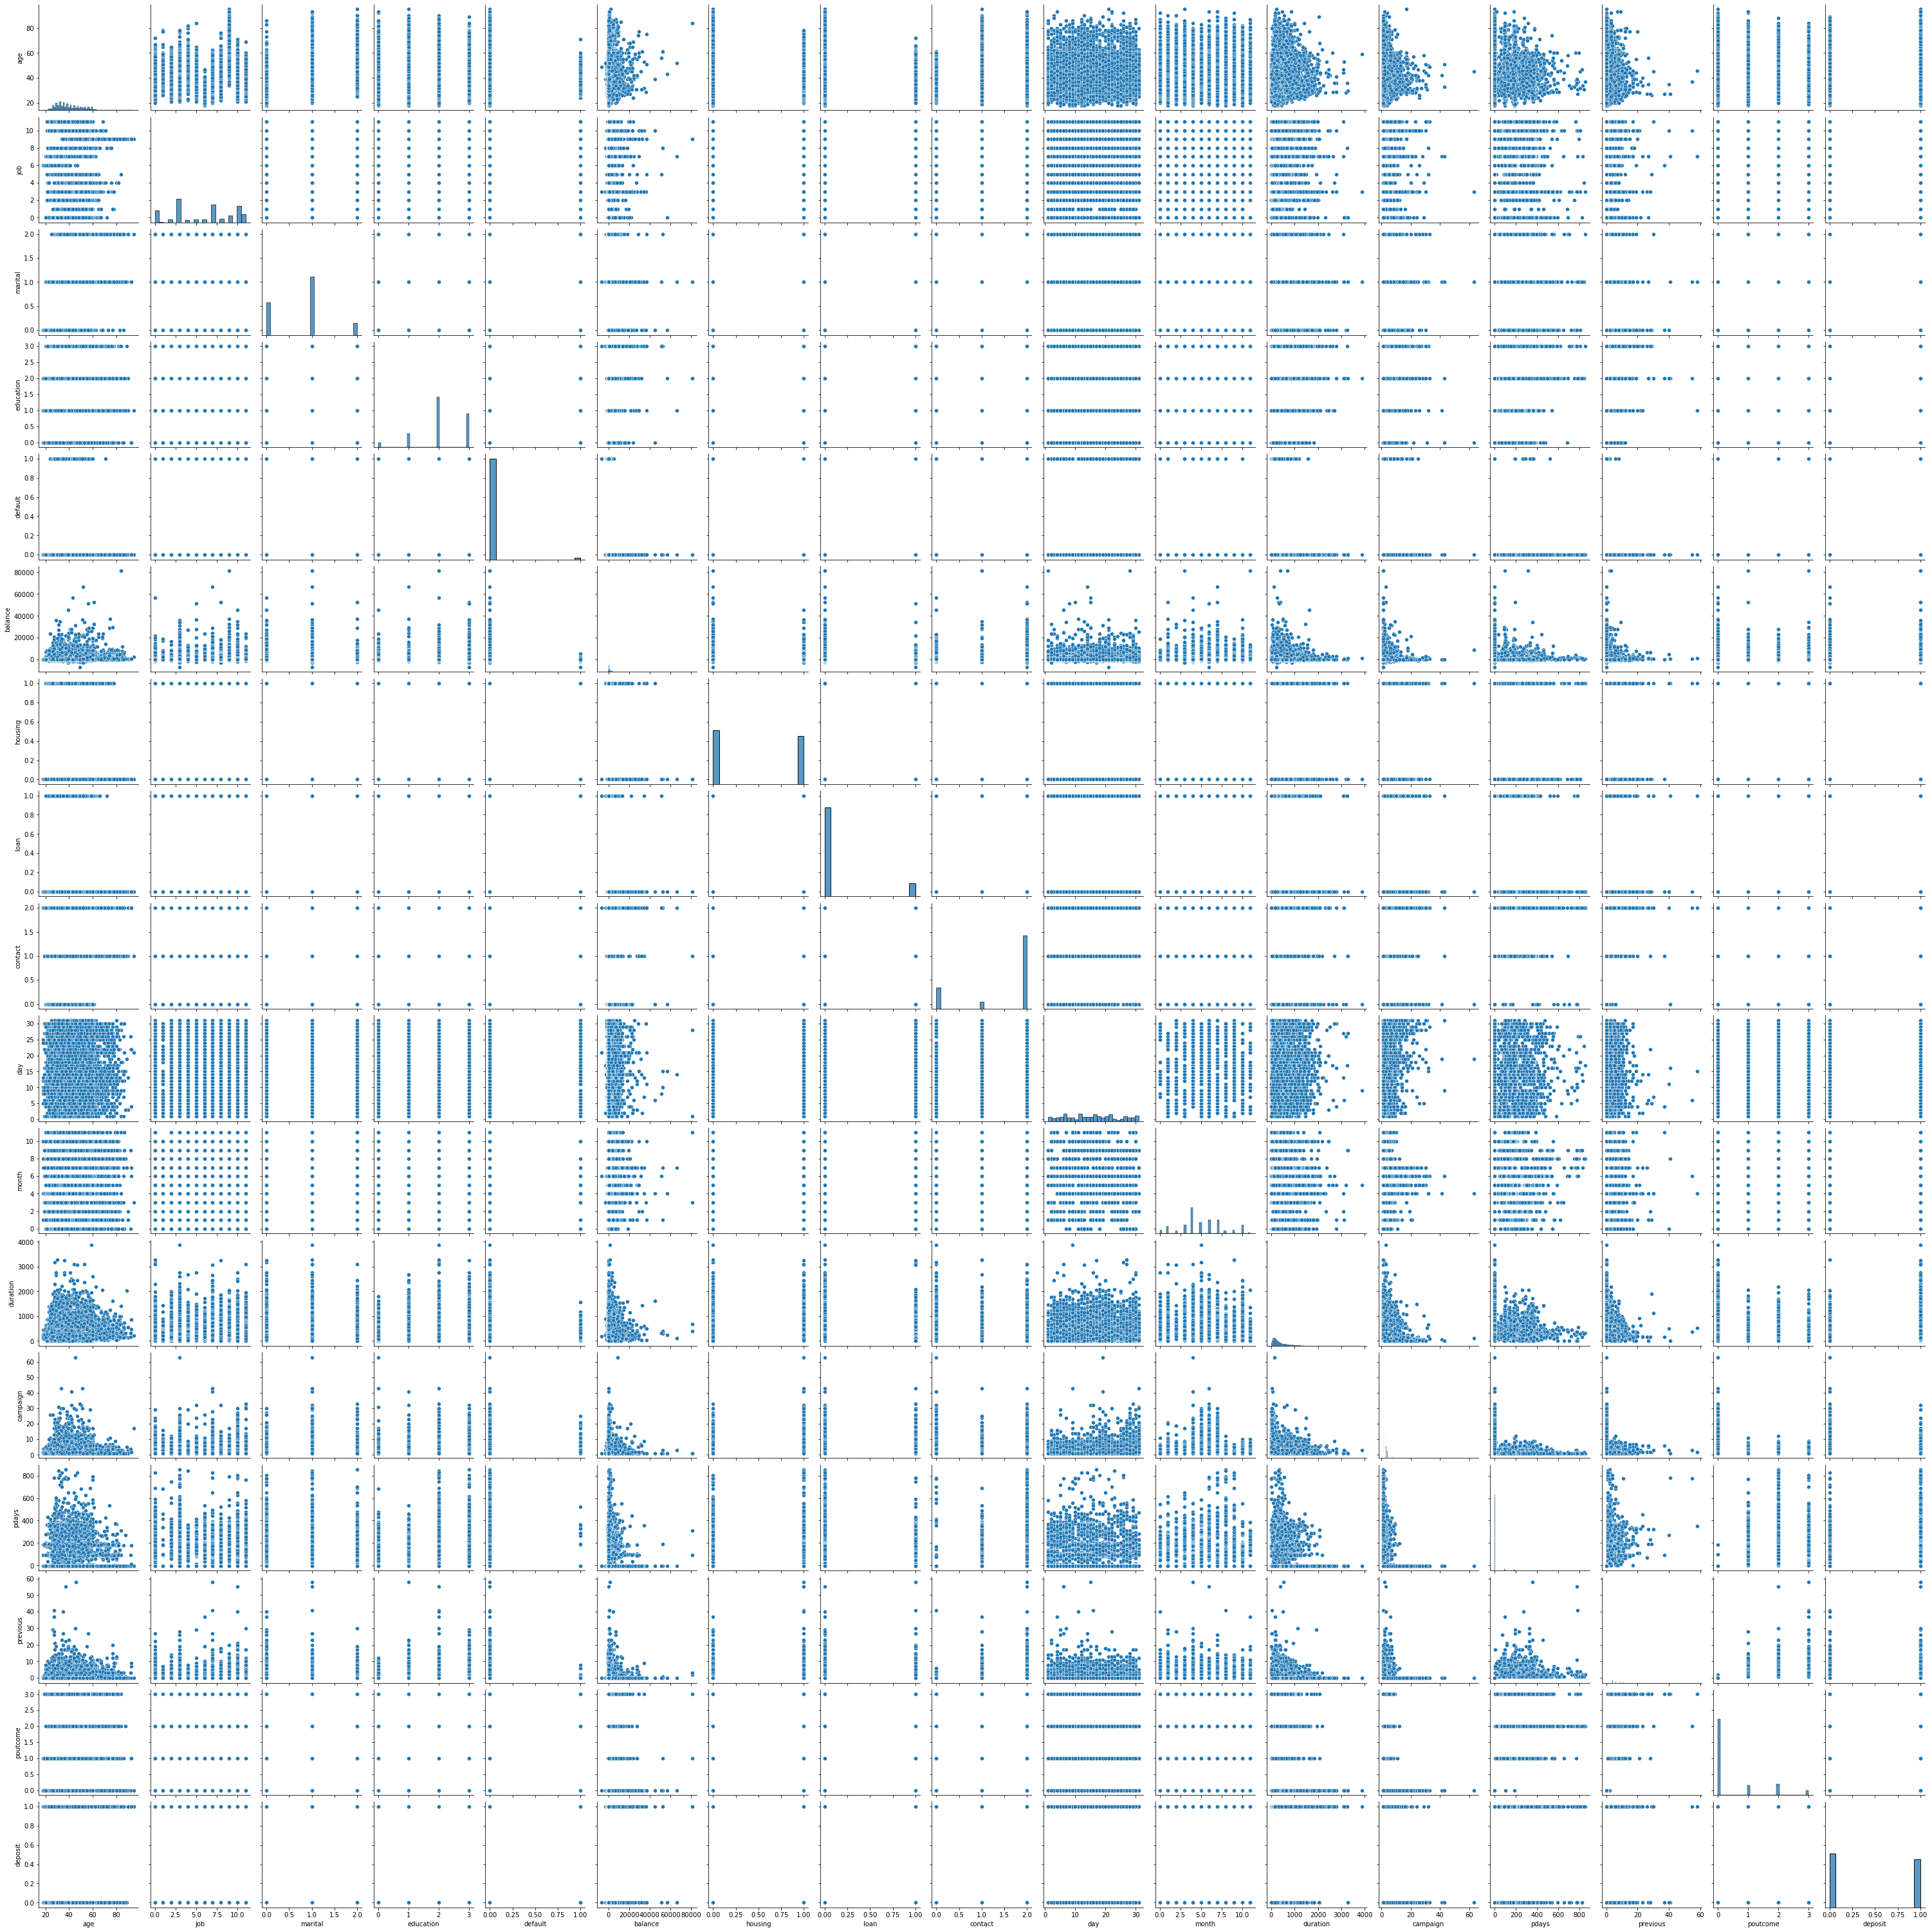

In [85]:
sns.pairplot(data)

In [34]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,2,0,2343,1,0,0,5,4,1042,1,-1,0,0,1
1,56,0,1,2,0,45,0,0,0,5,4,1467,1,-1,0,0,1
2,41,10,1,2,0,1270,1,0,0,5,4,1389,1,-1,0,0,1
3,55,11,1,2,0,2476,1,0,0,5,4,579,1,-1,0,0,1
4,54,0,1,3,0,184,0,0,0,5,4,673,2,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,7,0,1,0,1,1,0,2,20,3,257,1,-1,0,0,0
11158,39,11,1,2,0,733,0,0,0,16,5,83,4,-1,0,0,0
11159,32,10,0,2,0,29,0,0,2,19,7,156,2,-1,0,0,0
11160,43,10,1,2,0,0,0,1,2,8,4,9,2,172,5,2,0


In [35]:
print(data["pdays"].unique())

[ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154  99  93   2 242 272  76 160  90
 196 246 238 203 268 189 267  92   9  88  85 210 257 261 270 106 199 112
  41 294 231 239 302 135 307 222 138 323 141 320 264 316 315 256 146 328
  74 148 327 341 145 266 234 345 318 325 274 343 260 305 344 254 180 340
  82 181 278 153   4 349 334 176  87 269  86 169  83  79   6 259  13 161
 350  84  80 164  22 296  66 263 333  17  89  78 286 337 364 188 342 363
 352 295 353 356 288 367 366 359 347 370 284 300 306 361 287 301 355 371
 292 360 358 346 357 368 312 179 329 298 372 374 375 291  95 109  94  98
 186 101 187 321  40  96  21  35  97 285 103 212 293  81  38  28  67  60
 120  55 113  71 119  72  20 391  50 207 105 314 211 140 104  65 395 399
  49 389 386 412  62 229 385 156  63  64  69 394  70 185 102 190 461 116
 422 457 430 192 462 403 191 459 397 197 173 271 428 392 193 474 475 477
 130 283 157 476 131 132 129 134 114 121 107 115  5

In [36]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,2,0,2343,1,0,0,5,4,1042,1,-1,0,0,1
1,56,0,1,2,0,45,0,0,0,5,4,1467,1,-1,0,0,1
2,41,10,1,2,0,1270,1,0,0,5,4,1389,1,-1,0,0,1
3,55,11,1,2,0,2476,1,0,0,5,4,579,1,-1,0,0,1
4,54,0,1,3,0,184,0,0,0,5,4,673,2,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,7,0,1,0,1,1,0,2,20,3,257,1,-1,0,0,0
11158,39,11,1,2,0,733,0,0,0,16,5,83,4,-1,0,0,0
11159,32,10,0,2,0,29,0,0,2,19,7,156,2,-1,0,0,0
11160,43,10,1,2,0,0,0,1,2,8,4,9,2,172,5,2,0


In [60]:
x = data.iloc[:,0:16]
y = data.iloc[:,-1]

In [61]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,2,0,2343,1,0,0,5,4,1042,1,-1,0,0
1,56,0,1,2,0,45,0,0,0,5,4,1467,1,-1,0,0
2,41,10,1,2,0,1270,1,0,0,5,4,1389,1,-1,0,0
3,55,11,1,2,0,2476,1,0,0,5,4,579,1,-1,0,0
4,54,0,1,3,0,184,0,0,0,5,4,673,2,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,7,0,1,0,1,1,0,2,20,3,257,1,-1,0,0
11158,39,11,1,2,0,733,0,0,0,16,5,83,4,-1,0,0
11159,32,10,0,2,0,29,0,0,2,19,7,156,2,-1,0,0
11160,43,10,1,2,0,0,0,1,2,8,4,9,2,172,5,2


In [62]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [63]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score

In [64]:
x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x,y)

In [65]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_simple.values, y_train_simple.values)

In [66]:
y_predict = clf.predict(x_train_simple.values)
confusion_matrix(y_train_simple.values,y_predict)

array([[4434,    0],
       [   0, 3937]])

In [67]:
accuracy_score(y_train_simple.values,y_predict)

1.0

In [68]:
precision_score(y_train_simple.values,y_predict)

1.0

In [69]:
recall_score(y_train_simple.values,y_predict)

1.0

In [70]:
f1_score(y_train_simple.values,y_predict)

1.0

In [71]:
y_predict = clf.predict(x_test_simple.values)
confusion_matrix(y_test_simple.values,y_predict)

array([[1150,  289],
       [ 319, 1033]])

In [72]:
accuracy_score(y_test_simple.values,y_predict)

0.7821569329989251

In [73]:
precision_score(y_test_simple.values,y_predict)

0.7813918305597579

In [74]:
recall_score(y_test_simple.values,y_predict)

0.7640532544378699

In [75]:
f1_score(y_test_simple.values,y_predict)

0.7726252804786836

[Text(0.36841767680306425, 0.9807692307692307, 'X[11] <= 206.5\ngini = 0.498\nsamples = 8371\nvalue = [4434, 3937]'),
 Text(0.14095571748878924, 0.9423076923076923, 'X[13] <= 17.0\ngini = 0.319\nsamples = 3385\nvalue = [2712, 673]'),
 Text(0.07255792227204784, 0.9038461538461539, 'X[10] <= 3.5\ngini = 0.235\nsamples = 2656\nvalue = [2295, 361]'),
 Text(0.02303811659192825, 0.8653846153846154, 'X[11] <= 74.0\ngini = 0.488\nsamples = 423\nvalue = [244, 179]'),
 Text(0.0019133034379671151, 0.8269230769230769, 'X[11] <= 61.5\ngini = 0.102\nsamples = 74\nvalue = [70, 4]'),
 Text(0.0009566517189835576, 0.7884615384615384, 'gini = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(0.0028699551569506725, 0.7884615384615384, 'X[3] <= 2.5\ngini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.0019133034379671151, 0.75, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.0038266068759342303, 0.75, 'X[5] <= 1485.0\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.0028699551569506725, 0.71153846153

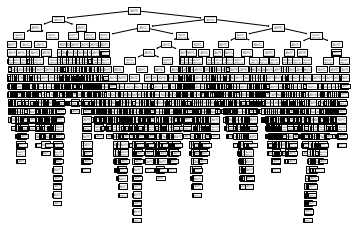

In [76]:
tree.plot_tree(clf)

In [78]:
prediction = clf.predict([[59,0 ,1,2 ,0 ,2343 ,1 ,0 ,0, 5, 4, 1042, 1, -1, 0, 0]])

In [83]:
def predict_val(prediction):
    if prediction == 1:
        return "Yes Deposited"
    else:
        return "Not Deposited"

In [84]:
predict_val(prediction)

'Yes Deposited'

In [86]:
prediction1 = clf.predict([[33, 7, 0, 1, 0, 1, 1, 0, 2, 20, 3, 257, 1, -1, 0, 0]])

In [87]:
predict_val(prediction1)

'Not Deposited'

In [92]:
x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x,y)

In [93]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train_simple.values, y_train_simple.values)

In [97]:
y_predict = clf.predict(x_test_simple.values)
confusion_matrix(y_test_simple.values,y_predict)

array([[1182,  273],
       [ 317, 1019]])

In [98]:
accuracy_score(y_test_simple.values,y_predict)

0.7886062343246149

In [99]:
precision_score(y_test_simple.values,y_predict)

0.7886996904024768

In [100]:
recall_score(y_test_simple.values,y_predict)

0.7627245508982036

In [101]:
f1_score(y_test_simple.values,y_predict)

0.7754946727549469

[Text(0.3603563527253093, 0.9821428571428571, 'X[11] <= 206.5\nentropy = 0.998\nsamples = 8371\nvalue = [4418, 3953]'),
 Text(0.06471122519950216, 0.9464285714285714, 'X[11] <= 88.5\nentropy = 0.728\nsamples = 3392\nvalue = [2703, 689]'),
 Text(0.015594113771139909, 0.9107142857142857, 'X[10] <= 3.5\nentropy = 0.241\nsamples = 1056\nvalue = [1014, 42]'),
 Text(0.008199721795153379, 0.875, 'X[11] <= 62.5\nentropy = 0.58\nsamples = 166\nvalue = [143, 23]'),
 Text(0.005856944139395271, 0.8392857142857143, 'X[0] <= 71.5\nentropy = 0.09\nsamples = 88\nvalue = [87, 1]'),
 Text(0.004685555311516217, 0.8035714285714286, 'entropy = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.007028332967274325, 0.8035714285714286, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.010542499450911487, 0.8392857142857143, 'X[9] <= 27.5\nentropy = 0.858\nsamples = 78\nvalue = [56, 22]'),
 Text(0.009371110623032433, 0.8035714285714286, 'X[6] <= 0.5\nentropy = 0.943\nsamples = 61\nvalue = [39, 22]'),
 Text(0.0

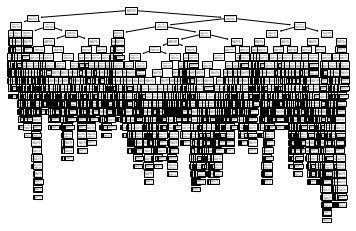

In [102]:
tree.plot_tree(clf)

In [103]:
# random forest

In [106]:
from sklearn.ensemble import RandomForestClassifier  

In [110]:
x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x,y)

In [111]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [113]:
clf = clf.fit(x_test_simple ,y_test_simple)

In [115]:
y_predict = clf.predict(x_test_simple)
confusion_matrix(y_test_simple.values,y_predict)

array([[1173,  298],
       [ 355,  965]])

In [116]:
accuracy_score(y_test_simple.values,y_predict)

0.7660336796847008

In [117]:
precision_score(y_test_simple.values,y_predict)

0.7640538400633412

In [118]:
recall_score(y_test_simple.values,y_predict)

0.7310606060606061

In [119]:
f1_score(y_test_simple.values,y_predict)

0.7471931862175766

In [121]:
prediction3 = [34 ,10 ,1 ,2 ,0 ,0 ,0 ,0 ,2 ,9 ,6 ,628, 1 ,-1 ,0 ,0]

In [122]:
def predict_val(prediction):
    if prediction == 1:
        return "Yes Deposited"
    else:
        return "Not Deposited"

In [123]:
predict_val(prediction3)

'Not Deposited'